In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import numpy as np


In [23]:
# Load dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\Retail_Dataset.csv")

In [24]:
print("Sample data:")
df.head()

Sample data:


,Product_id,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Open,Promo,StateHoliday,SchoolHoliday,Petrol_price
0,786725,Product_0033,Whse_S,Category_005,01/03/2016,16000,1,0,0,0,91
1,786743,Product_1825,Whse_S,Category_006,01/03/2016,50000,1,0,0,0,85
2,786967,Product_0551,Whse_S,Category_030,01/03/2016,3000,1,0,0,0,85
3,786856,Product_0556,Whse_S,Category_030,01/03/2016,1000,1,0,0,0,93
4,899538,Product_1844,Whse_A,Category_018,01/03/2016,7,1,0,0,0,95


In [25]:
df.columns

Index(['Product_id', 'Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'Petrol_price'],
      dtype='object')

In [26]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset has 169211 rows and 11 columns.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169211 entries, 0 to 169210
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Product_id        169211 non-null  int64 
 1   Product_Code      169211 non-null  object
 2   Warehouse         169211 non-null  object
 3   Product_Category  169211 non-null  object
 4   Date              169211 non-null  object
 5   Order_Demand      169211 non-null  int64 
 6   Open              169211 non-null  int64 
 7   Promo             169211 non-null  int64 
 8   StateHoliday      169211 non-null  object
 9   SchoolHoliday     169211 non-null  int64 
 10  Petrol_price      169211 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 14.2+ MB


In [28]:
print("\nSummary Statistics for Numerical Columns:")
df.describe()


Summary Statistics for Numerical Columns:


,Product_id,Order_Demand,Open,Promo,SchoolHoliday,Petrol_price
count,1.692110e+05,1.692110e+05,169211.000000,169211.000000,169211.000000,169211.000000
mean,9.528887e+05,5.248118e+03,0.817742,0.395364,0.133401,87.986183
std,5.555751e+04,3.116296e+04,0.386058,0.488930,0.340009,4.909978
min,6.909430e+05,0.000000e+00,0.000000,0.000000,0.000000,80.000000
25%,9.054275e+05,2.000000e+01,1.000000,0.000000,0.000000,84.000000
50%,9.526430e+05,3.000000e+02,1.000000,0.000000,0.000000,88.000000
75%,1.001416e+06,2.000000e+03,1.000000,1.000000,0.000000,92.000000
max,1.048574e+06,2.500000e+06,1.000000,1.000000,1.000000,96.000000


In [29]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product_id          0
Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Petrol_price        0
dtype: int64


C:\Users\dell\AppData\Local\Temp\ipykernel_14204\2785189310.py:17: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


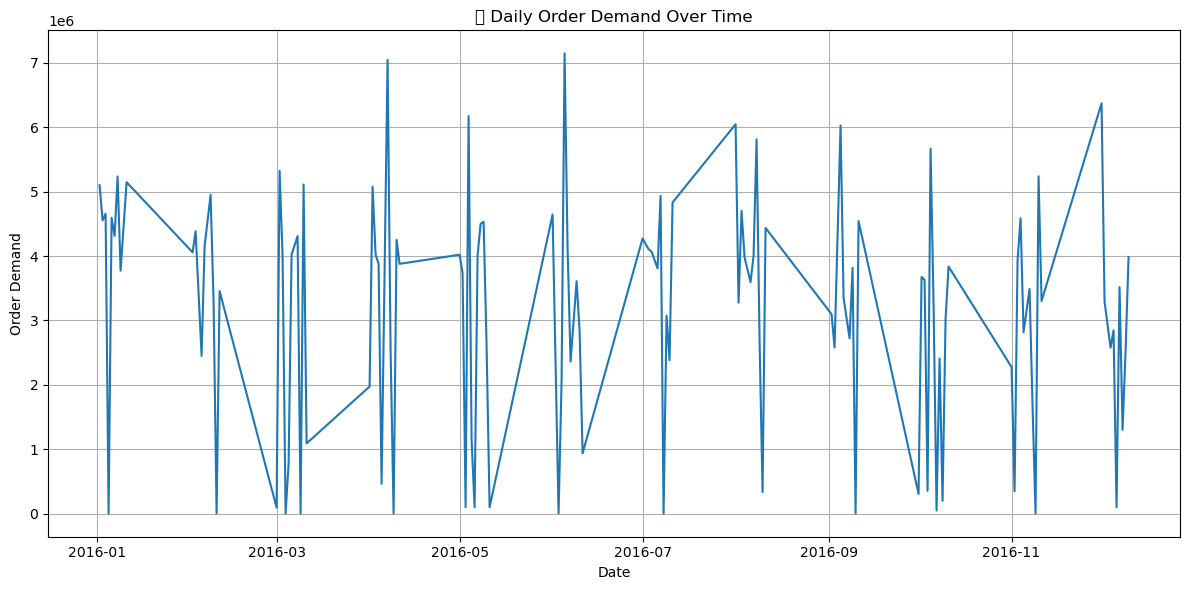

In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])
daily_sales = df.groupby('Date')['Order_Demand'].sum().reset_index()

# Plotting daily sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Order_Demand'])
plt.title('📅 Daily Order Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_14204\1529814949.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


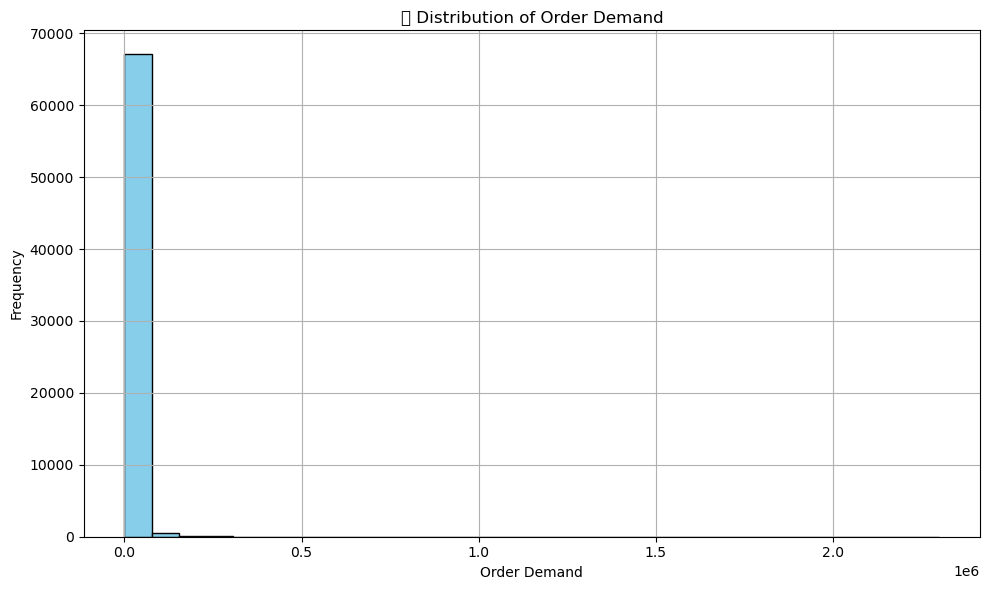

In [31]:
# Distribution of order demand
plt.figure(figsize=(10, 6))
plt.hist(df['Order_Demand'], bins=30, color='skyblue', edgecolor='black')
plt.title('📊 Distribution of Order Demand')
plt.xlabel('Order Demand')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


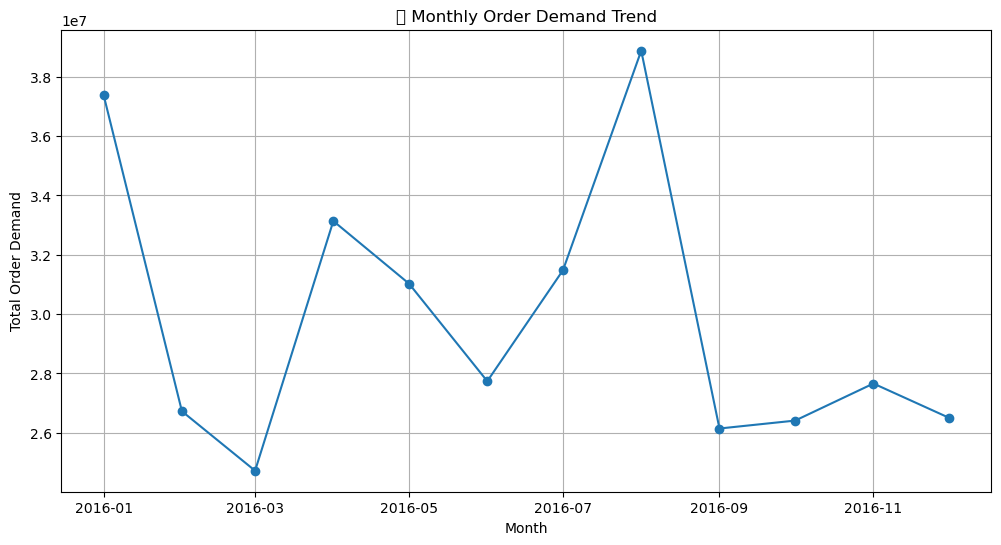

In [32]:
# monthly sales trend
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Order_Demand'].sum().reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()

# Plot monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Order_Demand'], marker='o', linestyle='-')
plt.title('📈 Monthly Order Demand Trend')
plt.xlabel('Month')
plt.ylabel('Total Order Demand')
plt.grid()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


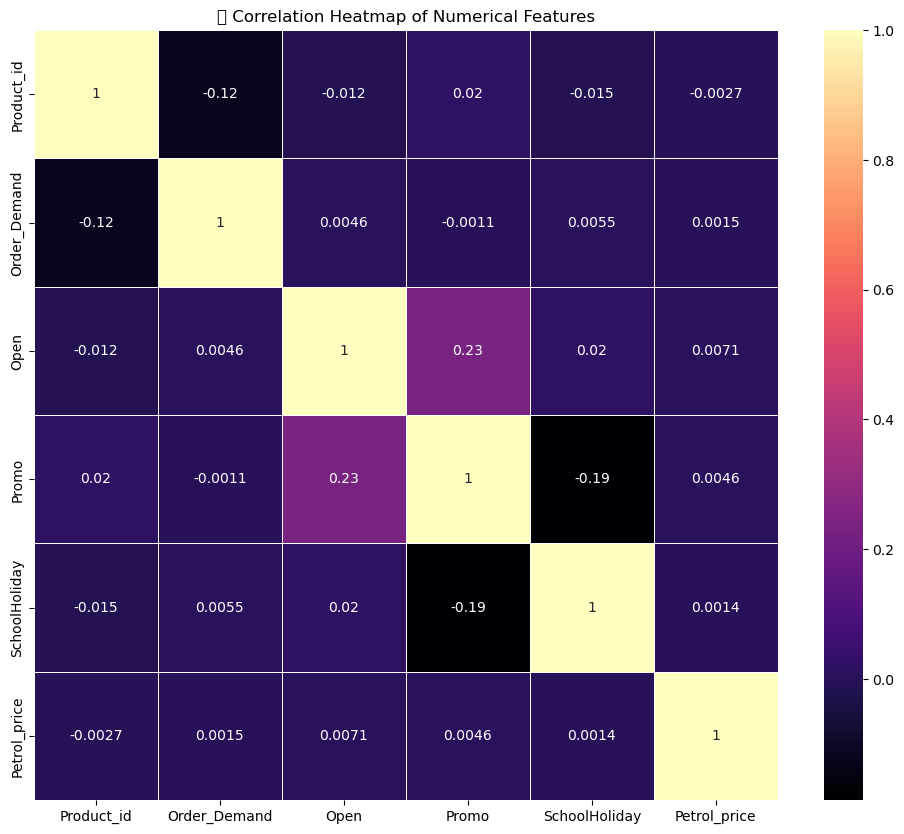

In [41]:
# Get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Correlation matrix
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('🔍 Correlation Heatmap of Numerical Features')
plt.show()


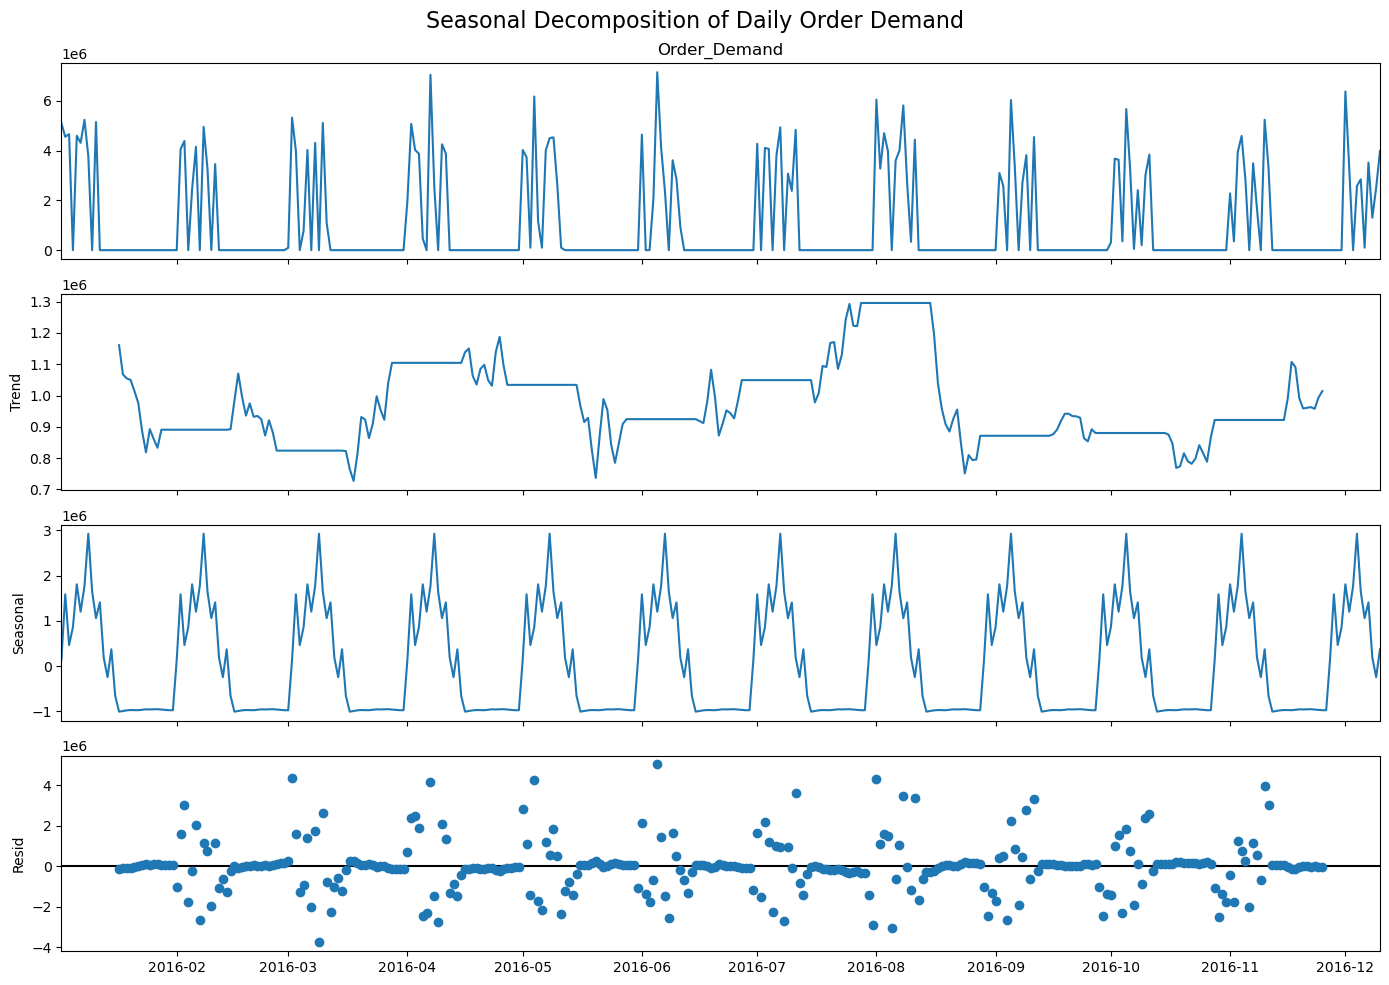

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
daily_sales = df.groupby('Date')['Order_Demand'].sum()
daily_sales = daily_sales.asfreq('D')  # Fill missing dates with NaN
daily_sales = daily_sales.fillna(0)

# Decompose using additive model 
decomposition = seasonal_decompose(daily_sales, model='additive', period=30)  # 30 for monthly cycle

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Seasonal Decomposition of Daily Order Demand", fontsize=16)
plt.tight_layout()
plt.show()


In [36]:
daily_sales = df.groupby('Date')['Order_Demand'].sum().reset_index()
daily_sales = daily_sales.sort_values('Date')
daily_sales = daily_sales.set_index('Date')

# Train-test split for time series
train = daily_sales.iloc[:-30]
test = daily_sales.iloc[-30:]


In [37]:
# Fit SARIMA model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,7))
result = model.fit(disp=False)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


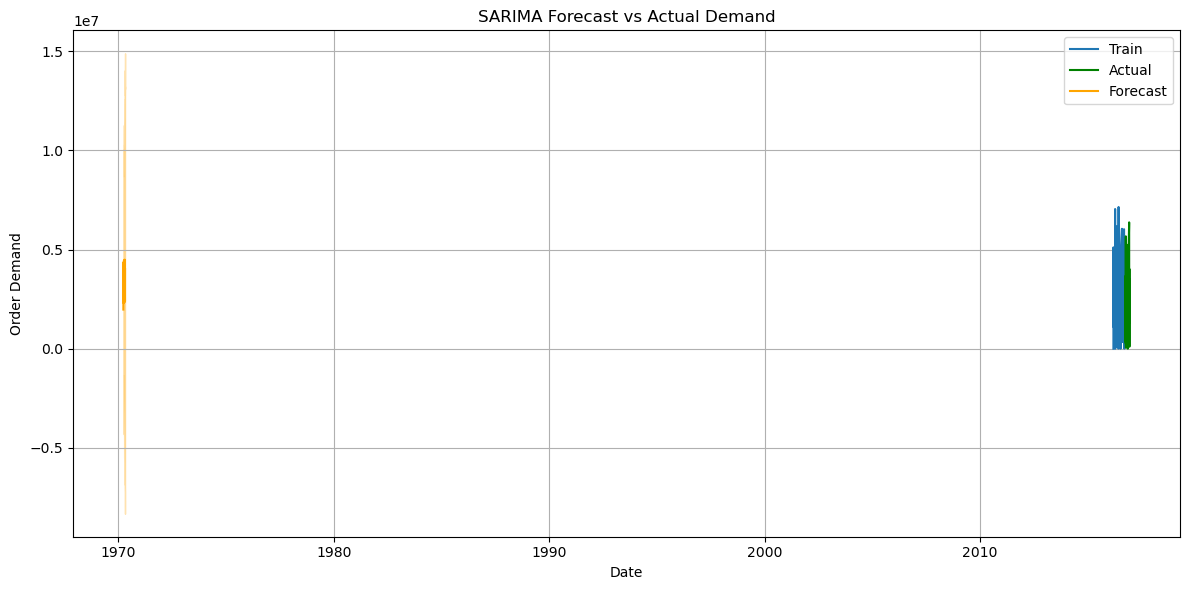

In [40]:
# Forecast
forecast = result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot results
plt.figure(figsize=(12,6))
plt.plot(train.index[-60:], train['Order_Demand'][-60:], label='Train')
plt.plot(test.index, test['Order_Demand'], label='Actual', color='green')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_mean.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
mae = mean_absolute_error(test, forecast_mean)
mape = np.mean(np.abs((test.values.flatten() - forecast_mean.values.flatten()) / test.values.flatten())) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 1889782.40
MAE: 1519121.18
MAPE: 5228.30%
